In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# -------------------------------------------------Add EDA cells above this point----------------------------------
data = pd.read_csv(r'C:\Users\bdhai\Downloads\AmesHousing.csv')
print(data.head())
print(data.info())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [2]:
data.drop(['PID'], axis=1, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [3]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

catg_cols = data.select_dtypes(include=['object']).columns
data[catg_cols] = data[catg_cols].fillna('None')
# Filling missing categorical and numerical values to ensure no loss of data with 'None'
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2930 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [4]:
#Try to compile similar data (bathroomsbedroomssquarfootage)
data['TotSF'] = data['Total Bsmt SF'] + data['1st Flr SF'] + data['2nd Flr SF']

data['TotBath'] = data['Full Bath'] + (0.5 * data['Half Bath']) + data['Bsmt Full Bath'] + (0.5 * data['Bsmt Half Bath'])
#
data.head()

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotSF,TotBath
0,1,20,RL,141.0,31770,Pave,None,IR1,Lvl,AllPub,...,None,None,0,5,2010,WD,Normal,215000,2736.0,2.0
1,2,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,MnPrv,None,0,6,2010,WD,Normal,105000,1778.0,1.0
2,3,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,...,None,Gar2,12500,6,2010,WD,Normal,172000,2658.0,1.5
3,4,20,RL,93.0,11160,Pave,None,Reg,Lvl,AllPub,...,None,None,0,4,2010,WD,Normal,244000,4220.0,3.5
4,5,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,MnPrv,None,0,3,2010,WD,Normal,189900,2557.0,2.5


In [5]:
print(data['TotSF'].describe())
print(data['TotBath'].describe())

count     2930.000000
mean      2546.607167
std        803.865160
min        334.000000
25%       2000.000000
50%       2450.000000
75%       2990.000000
max      11752.000000
Name: TotSF, dtype: float64
count    2930.000000
mean        2.217918
std         0.807444
min         1.000000
25%         1.500000
50%         2.000000
75%         2.500000
max         7.000000
Name: TotBath, dtype: float64


In [6]:
(data.columns)

Index(['Order', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garag

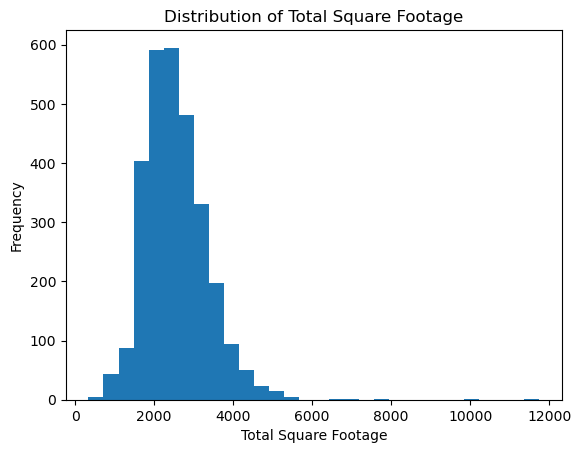

In [7]:
plt.hist(data['TotSF'], bins=30)
plt.xlabel('Total Square Footage')
plt.ylabel('Frequency')
plt.title('Distribution of Total Square Footage')
plt.show()

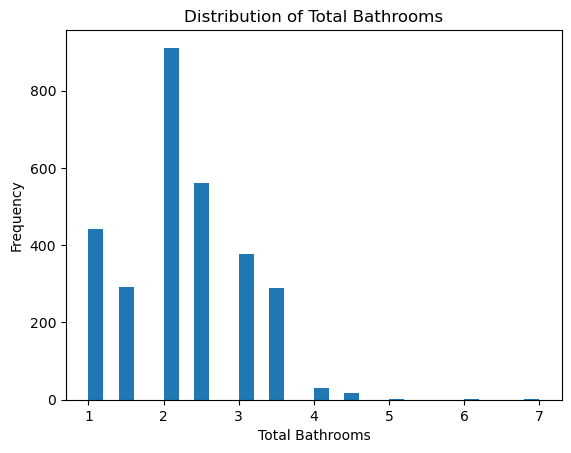

In [8]:
# PLotting the new Column in relation to Sum of Houses containing certain sq footage based on data
plt.hist(data['TotBath'], bins=30)
plt.xlabel('Total Bathrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Total Bathrooms')
plt.show()

# analysis to possibly add later show correlation between house type and bathroom amount

In [9]:
print(data.duplicated().sum())

0


In [10]:
print(data.isnull().sum().sort_values(ascending=False).head(80))

Order            0
Garage Area      0
Garage Finish    0
Garage Yr Blt    0
Garage Type      0
                ..
Foundation       0
Exter Cond       0
Exter Qual       0
Mas Vnr Area     0
Mas Vnr Type     0
Length: 80, dtype: int64


In [11]:
data.drop(['Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath'], axis=1, inplace=True)
(data.columns)

Index(['Order', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Wood Deck SF', 'Open

In [12]:
data = pd.get_dummies(data, drop_first=True)

In [44]:
# Model Learning
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

X = data.drop(['SalePrice'], axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [14]:
# Define the neural network model

model_a = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

model_a.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

historymae = model_a.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

test_loss, test_mae = model_a.evaluate(X_test, y_test, verbose=2)
print(f'\nTest MAE: {test_mae}')

# This model utilizes MAE instead of accuracy testing for the purpose of seeing how well the model can make predictions based on teh testing data.
#If the MAE results are good, then we can trust the model will do well with making future predictions based on the data at hand

C:\Users\bdhai\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 33942417408.0000 - mae: 166419.5000 - val_loss: 7132238848.0000 - val_mae: 62992.2461
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6343505920.0000 - mae: 53123.1445 - val_loss: 4157770752.0000 - val_mae: 42171.4961
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6516119552.0000 - mae: 47441.2188 - val_loss: 3591784704.0000 - val_mae: 42148.5117
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3980449792.0000 - mae: 43990.3047 - val_loss: 2961401088.0000 - val_mae: 36987.8125
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4579488256.0000 - mae: 42350.2031 - val_loss: 2630939392.0000 - val_mae: 35180.9883
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3143603712.0000 - mae: 39371.3203 - val_loss: 2340364544.0000 - val_mae: 31578.7715
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2658356736.0000 - mae: 35629.3945 - val_loss: 2201394432.0000 - val_mae: 30862.5078
Epo

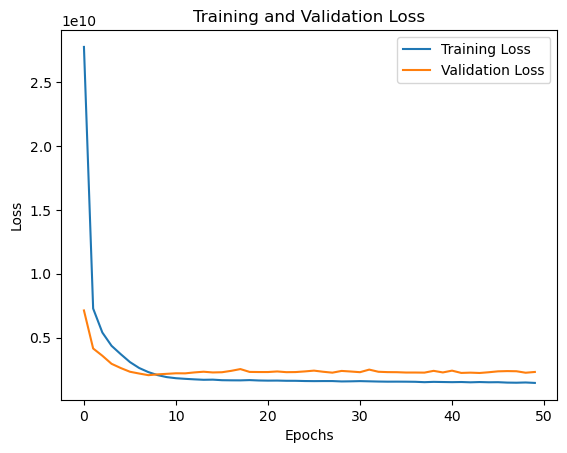

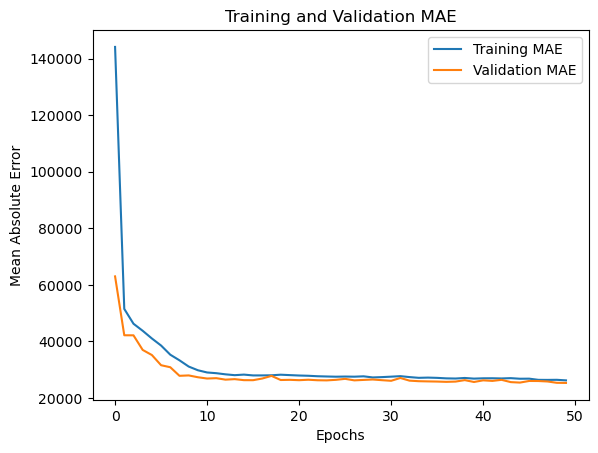

In [15]:
#plot visuals for testing training random state
plt.plot(historymae.history['loss'], label='Training Loss')
plt.plot(historymae.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(historymae.history['mae'], label='Training MAE')
plt.plot(historymae.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()
# THe Means of Absolute Error testing is to evaluate the margin of error in the model's predictions. 
# Here shows that the model is making very good generalizations, matching very closely to the training data

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}
# Additional Regression testing to further evaulate the models quality and stability

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary to store model performance
model_performance = {}

#For loop created to go trhough training data for each form of regression testing method and compile regression output 
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_performance[model_name] = {'MAE': mae, 'R2': r2}

performance_df = pd.DataFrame(model_performance).T
print(performance_df)

                            MAE        R2
Linear Regression  15098.908747  0.762704
Random Forest      14504.516246  0.883834
Gradient Boosting  13186.434164  0.918688


In [18]:
best_model_name = performance_df['R2'].idxmax()
best_model = models[best_model_name]

print(f"The best model is: {best_model_name} with R-squared: {performance_df.loc[best_model_name, 'R2']}")

The best model is: Gradient Boosting with R-squared: 0.9186878434856471


In [19]:
from sklearn.model_selection import GridSearchCV
# Set up Hyperparamter testing to find the best settings for the ML model to make it work as well as possible
# Do this by creating parameter grids

ranfor_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
gradboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [20]:
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

In [21]:
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=ranfor_param_grid, 
                               cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')
rf_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [32]:
rf_results = pd.DataFrame(rf_grid_search.cv_results_)
print("Random Forest Hyperparameter Tuning Results:")
print(rf_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])


Random Forest Hyperparameter Tuning Results:
                                                params  mean_test_score  \
0    {'bootstrap': True, 'max_depth': None, 'min_sa...    -16299.265611   
1    {'bootstrap': True, 'max_depth': None, 'min_sa...    -16166.185366   
2    {'bootstrap': True, 'max_depth': None, 'min_sa...    -16032.550625   
3    {'bootstrap': True, 'max_depth': None, 'min_sa...    -16167.517906   
4    {'bootstrap': True, 'max_depth': None, 'min_sa...    -16129.260492   
..                                                 ...              ...   
211  {'bootstrap': False, 'max_depth': 30, 'min_sam...    -23097.142164   
212  {'bootstrap': False, 'max_depth': 30, 'min_sam...    -23098.465482   
213  {'bootstrap': False, 'max_depth': 30, 'min_sam...    -22999.175201   
214  {'bootstrap': False, 'max_depth': 30, 'min_sam...    -23000.853583   
215  {'bootstrap': False, 'max_depth': 30, 'min_sam...    -22999.023280   

     std_test_score  rank_test_score  
0       1192.13

In [34]:
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gradboost_param_grid, 
                               cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')
gb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [35]:
gb_results = pd.DataFrame(gb_grid_search.cv_results_)
print("\nGradient Boosting Hyperparameter Tuning Results:")
print(gb_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])



Gradient Boosting Hyperparameter Tuning Results:
                                                params  mean_test_score  \
0    {'learning_rate': 0.01, 'max_depth': 3, 'min_s...    -41211.645331   
1    {'learning_rate': 0.01, 'max_depth': 3, 'min_s...    -30700.102880   
2    {'learning_rate': 0.01, 'max_depth': 3, 'min_s...    -21510.096619   
3    {'learning_rate': 0.01, 'max_depth': 3, 'min_s...    -41211.645331   
4    {'learning_rate': 0.01, 'max_depth': 3, 'min_s...    -30700.102880   
..                                                 ...              ...   
238  {'learning_rate': 0.2, 'max_depth': 7, 'min_sa...    -15987.963749   
239  {'learning_rate': 0.2, 'max_depth': 7, 'min_sa...    -15987.263464   
240  {'learning_rate': 0.2, 'max_depth': 7, 'min_sa...    -15844.206072   
241  {'learning_rate': 0.2, 'max_depth': 7, 'min_sa...    -15711.393087   
242  {'learning_rate': 0.2, 'max_depth': 7, 'min_sa...    -15710.591852   

     std_test_score  rank_test_score  
0       26

In [52]:
# Making Predictions 

# Get the best trained model
best_model = rf_grid_search.best_estimator_

# Ensure X_test has the same features as the training set before prediction
X_test_fixed = X_test.drop(columns=['Yr Sold'], errors='ignore')  # Removes 'Yr Sold' if present

# Make predictions using the corrected feature set
predictions = best_model.predict(X_test_fixed)

# Add 'Yr Sold' back for analysis
X_test_with_year = X_test.copy()
X_test_with_year['Yr Sold'] = data.loc[X_test.index, 'Yr Sold']

# Create DataFrames for actual and predicted sales by year
y_test_df = pd.DataFrame({'Yr Sold': X_test_with_year['Yr Sold'], 'Actual Price': y_test})
pred_df = pd.DataFrame({'Yr Sold': X_test_with_year['Yr Sold'], 'Predicted Price': predictions})

# Aggregating sales by year
actual_sales_by_year = y_test_df.groupby('Yr Sold')['Actual Price'].sum()
predicted_sales_by_year = pred_df.groupby('Yr Sold')['Predicted Price'].sum()

# Store results in a DataFrame
results = pd.DataFrame({'Actual Sales': actual_sales_by_year, 'Predicted Sales': predicted_sales_by_year})

# Display the results
print(results)



         Actual Sales  Predicted Sales
Yr Sold                               
2006         20690241     2.047205e+07
2007         29217231     2.909271e+07
2008         21292146     2.165301e+07
2009         22576964     2.305064e+07
2010         10288104     1.021306e+07


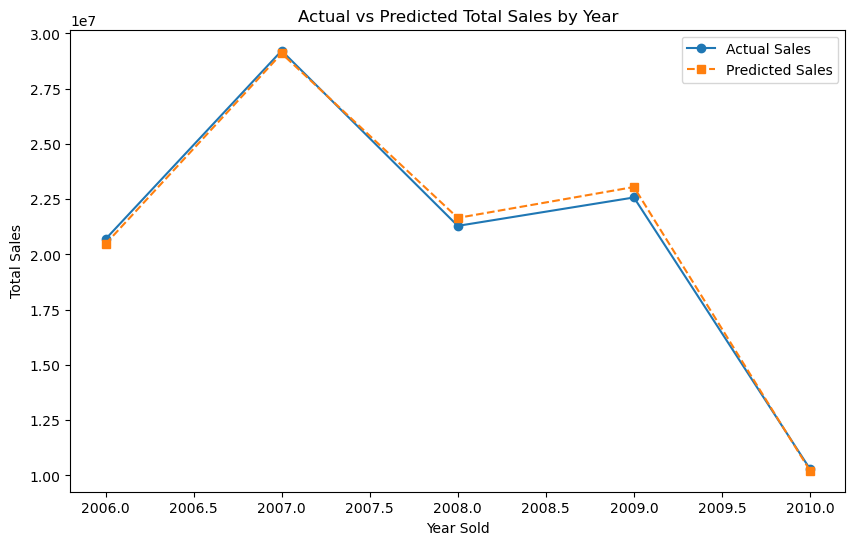

In [54]:
# Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Actual Sales'], marker='o', label='Actual Sales')
plt.plot(results.index, results['Predicted Sales'], marker='s', linestyle='dashed', label='Predicted Sales')
plt.xlabel('Year Sold')
plt.ylabel('Total Sales')
plt.title('Actual vs Predicted Total Sales by Year')
plt.legend()
plt.show()


In [56]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 14443.166780998812
Mean Squared Error: 582356735.1407039
